In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stress_data = pd.read_csv('Stress-Lysis.csv')

In [3]:
stress_data

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0
...,...,...,...,...
1996,21.82,90.82,96,1
1997,10.45,79.45,45,0
1998,27.22,96.22,135,2
1999,12.46,81.46,64,0


In [4]:
stress_data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


<Axes: xlabel='Stress Level', ylabel='count'>

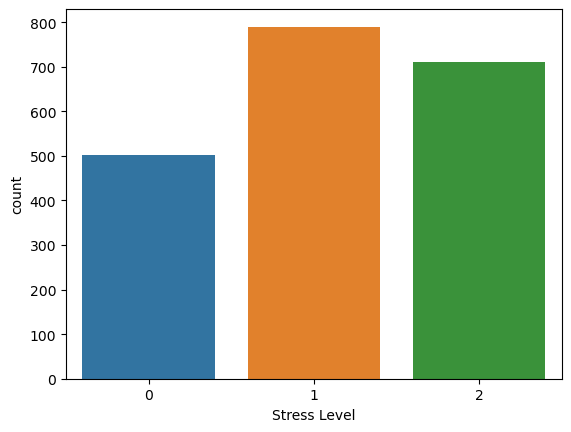

In [5]:
sns.countplot(data=stress_data,x='Stress Level')

In [6]:
X = stress_data.drop('Stress Level',axis=1)
Y = stress_data['Stress Level']

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4) 

In [9]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=4)

In [10]:
knn.predict(X_test)

array([1, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 0,
       0, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2,
       2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 2, 2,
       1, 1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2,
       1, 0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 1,
       1, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0,
       1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2,
       1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1,
       0, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1,
       1, 2, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1, 1,
       2, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 1, 1,

In [11]:
predictions = knn.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       120
           1       0.97      1.00      0.99       143
           2       1.00      1.00      1.00       138

    accuracy                           0.99       401
   macro avg       0.99      0.99      0.99       401
weighted avg       0.99      0.99      0.99       401



In [13]:
confusion_matrix(Y_test,predictions)

array([[116,   0,   0],
       [  4, 143,   0],
       [  0,   0, 138]], dtype=int64)

<Axes: >

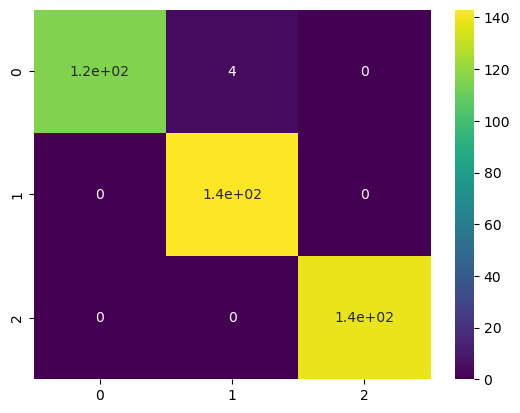

In [14]:
sns.heatmap(confusion_matrix(predictions,Y_test),annot=True,cmap='viridis')

In [16]:
predictions != Y_test

1459    False
198     False
1385    False
1046    False
1052    False
        ...  
1896    False
1058    False
1478    False
859     False
669     False
Name: Stress Level, Length: 401, dtype: bool

In [17]:
error_rate = []
for k in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != Y_test))

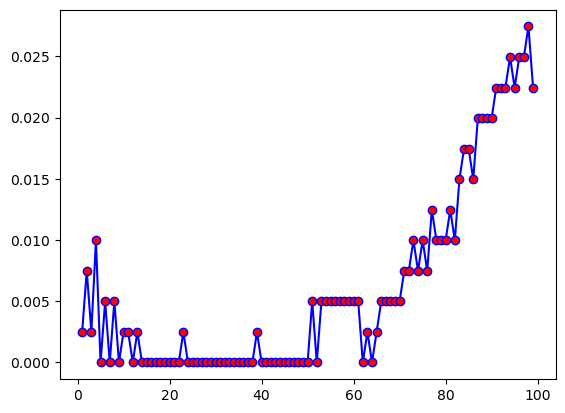

In [18]:
plt.plot(range(1,100),error_rate,marker='o', linestyle='-', color='blue', markerfacecolor='red')

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy = accuracy_score(Y_test,predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9775561097256857
